# Support Vector Models

possible models in this group

1. Support Vector Machines = Kernel Trick applied to Maximum Margin Classifier

2. apply kernel function and then apply an algorithm, say, Logistic Regression

3. Maximum Margin classifier

SVMs can efficiently perform nonlinear classification, 

using a trick or parameter known as the kernel, 

which maps their inputs to high-dimensional feature spaces. 

The term kernel trick refers to a function that transforms data into a suitable format.

The SVM algorithm uses various kernel functions, 

including linear, nonlinear, polynomial, and radial basis functions. 

The kernel trick turns a low-dimensional input space into a high-dimensional one.

discriminant classifier governed by a separating hyperplane

supervised model

can do both Regression and Classification

solve linear and nonlinear problems makes it useful for various practical applications

create a line that separates classes, e.g., in a classification problem. The line is designed to maximize the margin between the points on either side of the so-called decision line. By doing this, the model can easily guess the new target classes (labels) for new cases after the separation process.

The Support Vector Machine (SVM) is the only linear model which can classify data which is not linearly separable.

Keyords: Kernel trick, support vectors, decision boundary, hyperplane, margin classification, separatability

Lane!- outer boundaries of each class is drawn first, then the decision boundary is drawn 
equidistant from the outer boundaries

SVMs are sensitive to feature scales
hyperparameter - C ("lane width" for my understanding)

SVC classifiers do notput probabilities unlike Logistic Regression




SVM working

finding a hyperplane that divides a dataset into two groups

the hyperplane is a crucial part of the SVM, as it linearly separates and classifies a dataset.

support vectors are the nearest points to the hyperplane 

—the points that would alter the position of the dividing hyperplane if removed. 

In this way, they can be regarded as crucial elements of a dataset.


#### Advantages:


1. works when there is clear margin of separation

2. effective in High Dimensional spaces, 

3. effective when number of Dimensions is greater than number of samples, 

4. relatively memory efficient (require less memory)

5. **best works for small/medium sized complex datasets**

#### Disadvantages

1. not suitable for large datasets, 
2. less effective when there is more noise, 
3. no probabilities output - cannot be explained probabilistically

#### Types of SVC

1. LinearSVC - for classes that are linearly separable

2. Poly Trans & then apply LinearSVC - Polynomial data with lower degree polynomial

3. SVC with "kernel = poly" - Polynomial data with higher degree polynomial

4. RBF (radial based function) Kernels - leverages similarity function

Code: LinearSVC for Linear datasets, SVC (with kernels config) for non-linear/complex datasets, SVR for regression

### Kernel

a kernel is a method of solving a nonlinear problem, using a linear classifier.

Kernel is a function that takes 2 data vectors as inputs and returns a number.

The number gives a sense of similarity (a specific 'abstract concept) of between the 2 vectors.

Kernel is central to success of SVMs and can also be used to enhance other algorithms

Kernel based versions of Linear Reg, Logistic Reg & PCA exist



### Kernel Trick


kernel trick transforms a non linear dataset into a **higher-dimensional space** dataset which is linearly separable

some Algorithms depend on how the data is arranged **geometrically**

GEOMETRY of a datasetcan be captured by computing the **similarity** of every pair of datapoints

Mathematically the similarity between 2 vectors can be computed by their inner product, also known as the **DOT PRODUCT**

#### Dot product

any Algorithm that depends only of the geometry of the dataset can be cast in terms of DOT PRODUCTS

Then we can replace dot products with a kernel function and gain access to a wider range of possibilities



In [ ]:
### Kernels Functions

Linear Regression Kernel function
Quadratic Kernel function
Polynomial Kernel function
Gaussian Kernel function (radial basis fn)

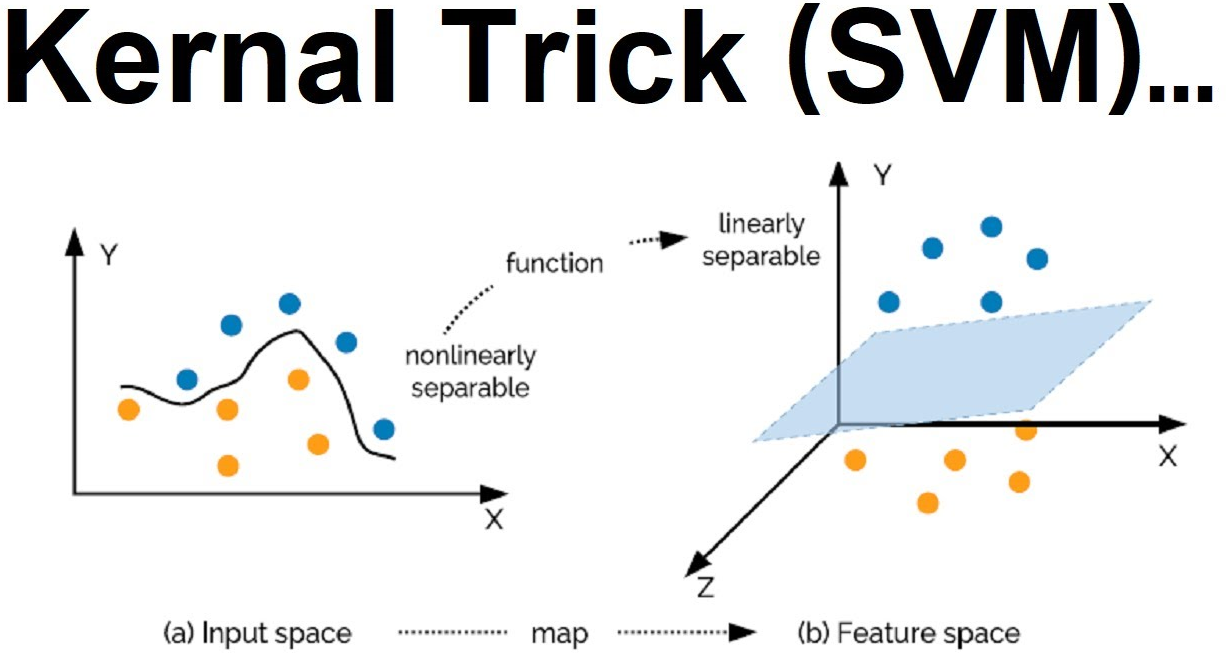

Sklearn come prepackage with a number of kernels in the SVC implementation,
 including Radius Basis Kernel (RBF) and Polynomial Kernels,
 each have their own hyper parameters which can be
adjusted experimentally using cross validation to achieve the best results.


The kernel trick is a really simple rearrangement of the original equation
 we can see that we’ve totally removed ø(x)
 and only have to perform computations using our original input features,
 but still have the effect of computing a high dimensional space.


If the data is not linearly separable in the original, or input,
space then we apply transformations to the data,
which map the data from the original space into a higher dimensional feature space.
The goal is that after the transformation to the higher dimensional space,
the classes are now linearly separable in this higher dimensional feature space.
We can then fit a decision boundary to separate the classes and make predictions.
The decision boundary will be a hyperplane in this higher dimensional space.

### Maximum Margin Classifier technique

SVM creates two parallel hyperplanes that pass through the nearest data points.
These nearest points are called support vectors, 

The region between the support vectors is called the margin 
and is bounded by the two hyperplanes.

These hyperplanes can be drawn in many different ways to classify the data.
A hyperplane with the maximum margin is the most stable,
and the margin indicates how far two classes are apart. 

In mathematics, the hyperplane with the highest margin is called the maximum margin hyperplane,
and the classifier it defines is called the maximum margin classifier. Here is an illustration of the concept.

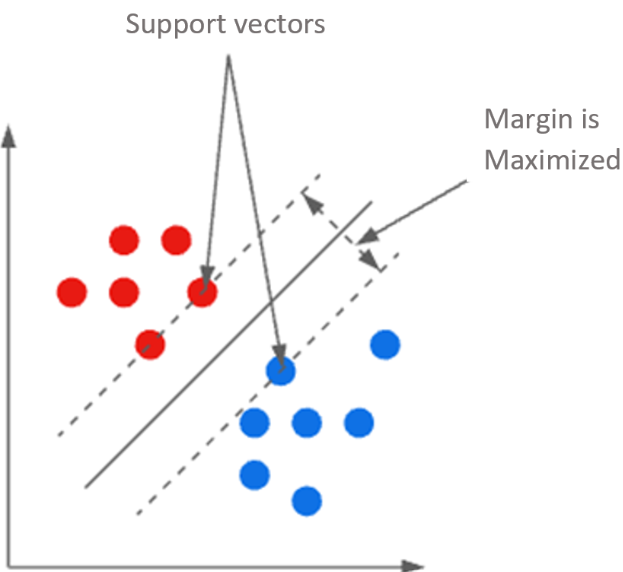

In [75]:
# Libs

# basics
import numpy as np
import pandas as pd

# plots
import seaborn as sns
import matplotlib.pyplot as plt

# models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
from sklearn.svm import SVC

# other
from sklearn.model_selection import train_test_split

# data
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import make_blobs

# time function for timing program run
import time

In [8]:
# Data


# importing dataset
iris = load_iris()
iris = pd.DataFrame(iris.data,columns=iris.feature_names)

wine = load_wine()


iris.head()

wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:

df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [11]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [12]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [11]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

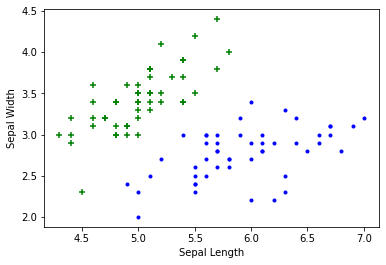

In [13]:
# Sepal length vs Sepal Width (Setosa vs Versicolor)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

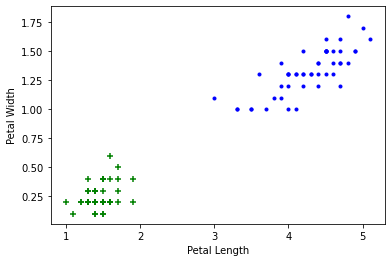

In [14]:
# Petal length vs Pepal Width (Setosa vs Versicolor)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [13]:
X = df.drop(['target','flower_name'], axis='columns')
Y = df.target

In [14]:
# 4 Splitting the data into train and test test



X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)


In [20]:
len(X_train)

120

In [21]:
len(X_test)

30

In [17]:
from sklearn.svm import SVC
model = SVC()

In [18]:
model.fit(X_train, Y_train)

SVC()

In [19]:
model.score(X_test, Y_test)

1.0

In [20]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [ ]:
# Tune parameters

In [21]:
# 1. Regularization (C)

model_C = SVC(C=1)
model_C.fit(X_train, Y_train)
model_C.score(X_test, Y_test)

1.0

In [22]:
model_C = SVC(C=10)
model_C.fit(X_train, Y_train)
model_C.score(X_test, Y_test)

1.0

In [23]:
# 2. Gamma

model_g = SVC(gamma=10)
model_g.fit(X_train, Y_train)
model_g.score(X_test, Y_test)

0.9666666666666667

In [24]:
# 3. Kernel
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, Y_train)

SVC(kernel='linear')

In [25]:
model_linear_kernal.score(X_test, Y_test)

1.0

In [9]:
# BerkAI wine dataset

#wine = pd.DataFrame(wine.data,columns=wine.feature_names)

X, y = load_wine(return_X_y=True, as_frame=True)
X, y = X[['total_phenols', 'color_intensity']].values, y

In [29]:
# Kernel Function + Logistic Regression Models

# Here we are applying Kernel function separately and then applying Logistic Regression

#1 Logistic Regression
logistic = LogisticRegression().fit(X, y)
print("Accuracy for Logistics Regression: ", "%.2f" % (logistic.score(X, y) * 100), "%")

#2 Logistic Regression with Linear Kernel
ktrain = polynomial_kernel(X, X, degree = 1)
linear_logistic = LogisticRegression(max_iter = 1000).fit(ktrain, y)
print("Accuracy for Logistics Regression with Linear Kernel: ", "%.2f" % (linear_logistic.score(ktrain, y) * 100), "%")

#3 Logistic Regression with Cubic Kernel
ktrain = polynomial_kernel(X, X, degree = 3)
cubic_logistic = LogisticRegression(max_iter = 1000).fit(ktrain, y)
print("Accuracy for Logistics Regression with Cubic Kernel: ", "%.2f" % (cubic_logistic.score(ktrain, y) * 100), "%")

#4 Logistic Regression with Quintet Kernel
ktrain = polynomial_kernel(X, X, degree = 5)
cubic_logistic = LogisticRegression(max_iter = 1000).fit(ktrain, y)
print("Accuracy for Logistics Regression with Quintet Kernel: ", "%.2f" % (cubic_logistic.score(ktrain, y) * 100), "%")

#4 Logistic Regression with Gaussian (radial basis) Kernel
ktrain_rbf = rbf_kernel(X, X)
rbf_logistic = LogisticRegression().fit(ktrain_rbf, y)
print("Accuracy for Logistics Regression with Gaussian (radial basis) Kernel: ", "%.2f" % (cubic_logistic.score(ktrain, y) * 100), "%")

Accuracy for Logistics Regression:  87.08 %
Accuracy for Logistics Regression with Linear Kernel:  88.20 %
Accuracy for Logistics Regression with Cubic Kernel:  91.57 %
Accuracy for Logistics Regression with Quintet Kernel:  87.64 %
Accuracy for Logistics Regression with Gaussian (radial basis) Kernel:  87.64 %


In [63]:
# function to generate decision boundary

def decision_boundary(svc, kernel = ''):
    '''
    This function takes in a fit SVC classifier
    and draws a decision boundary based on the first 
    two features in array X.
    '''
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z3 = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy,  Z3, cmap = 'Blues', alpha = 0.4)
    plt.scatter(X[:, 0], X[:, 1], c = y)
    plt.title(f'{kernel} Boundary from SVC');

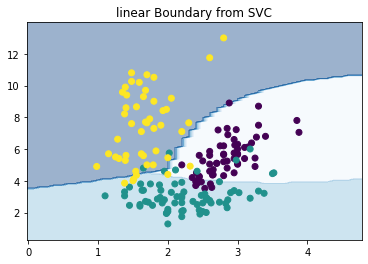

In [57]:
# SVS Models - Gaussian (radial basis) - default
svc_gauss = SVC(kernel = 'rbf').fit(X, y)
decision_boundary(svc_gauss)

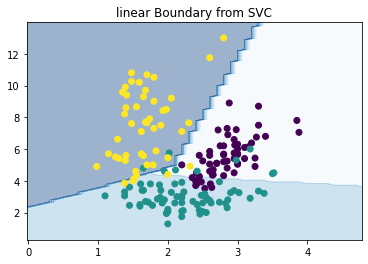

In [58]:
# SVS Models - Linear
svc_linear = SVC(kernel = 'linear').fit(X, y)
decision_boundary(svc_linear)

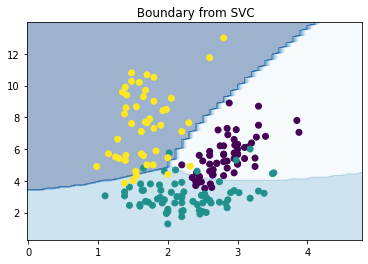

In [54]:
# SVS Models - Poly
svc_poly = SVC(kernel = 'poly').fit(X, y)
decision_boundary(svc_poly)

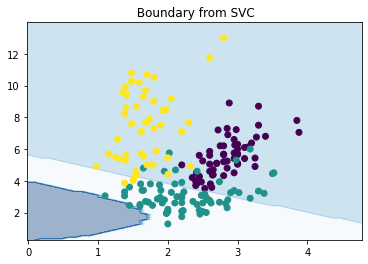

In [55]:
# SVS Models - Sigmoid
svc_sigmoid = SVC(kernel = 'sigmoid').fit(X, y)
decision_boundary(svc_sigmoid)

In [61]:
# Synthetic Data

X, y = make_blobs(centers = 2, cluster_std = 3, random_state = 42)

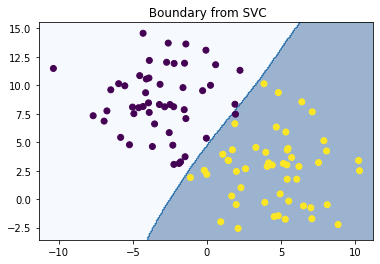

In [64]:
# SVS Models - Gaussian (radial basis) - default
svc_gauss = SVC(kernel = 'rbf').fit(X, y)
decision_boundary(svc_gauss)

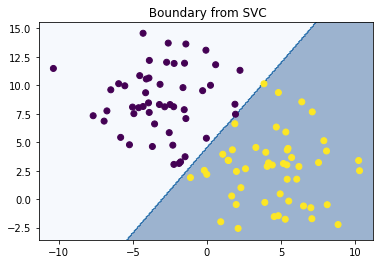

In [65]:
# SVS Models - Linear
svc_linear = SVC(kernel = 'linear').fit(X, y)
decision_boundary(svc_linear)

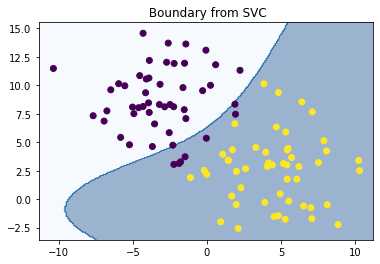

In [66]:
# SVS Models - Poly
svc_poly = SVC(kernel = 'poly').fit(X, y)
decision_boundary(svc_poly)

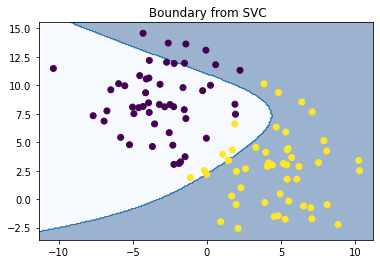

In [67]:
# SVS Models - Sigmoid
svc_sigmoid = SVC(kernel = 'sigmoid').fit(X, y)
decision_boundary(svc_sigmoid)

In [73]:
# Quick SVM on data

# my folder path
from pathlib import Path
myfolder = Path("C:/Users/pdpc/Documents/MLfiles/Data/")

data = pd.read_excel(myfolder / "breastcancer.xlsx")

drop_col = ['id']

y_column = ["diagnosis"]

# Drop unneeded column(s) by column name(s)
data = data.drop(drop_col, axis=1, errors='ignore')

# X/y split
X  = data.drop(y_column, axis=1, errors='ignore')
y  = data[y_column].copy()

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.10)

In [ ]:
svc = SVC().fit(X_train, y_train)
svc_defaults = svc.score(X_test, y_test)

In [ ]:
# Grid Search for Best Parameters

params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'gamma': [0.001, 0.1, 1.0, 100.0],}

tic = time.time()

grid = GridSearchCV(SVC(), param_grid=params).fit(X_train, y_train)
grid_score = grid.score(X_test, y_test)

toc = time.time()
print('time taken for evaluation:', round(toc-tic) , 'seconds' , "\n")

print(grid_score)